# Linear regression and gradient descent

In [17]:
def hypothesis(sigma0, sigma1, x):
    return sigma0 + sigma1 * x

def cost(sigma0, sigma1, xs, ys):
    sum = 0
    for i in range(0, len(xs)):
        sum += (hypothesis(sigma0, sigma1, xs[i]) - ys[i]) ** 2
    return sum / len(xs)

import numpy as np

number_of_samples = 100
xs = np.random.rand(number_of_samples)
ys = 5*xs + 3.68 + np.random.rand(number_of_samples)*0.5
xs = xs.tolist()
ys = ys.tolist()

cost(3.68, 5, xs, ys)

0.09635069105254891

3.936517684713886 + x*5.026884303561143


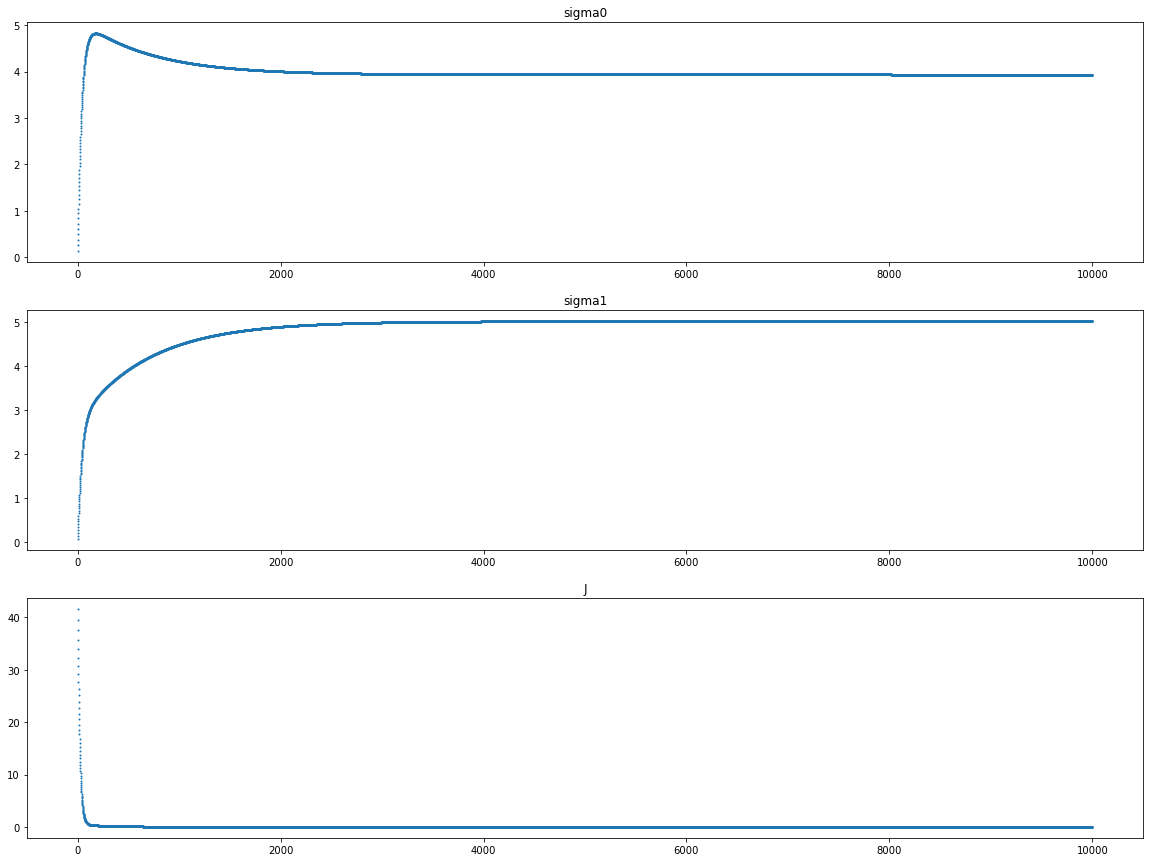

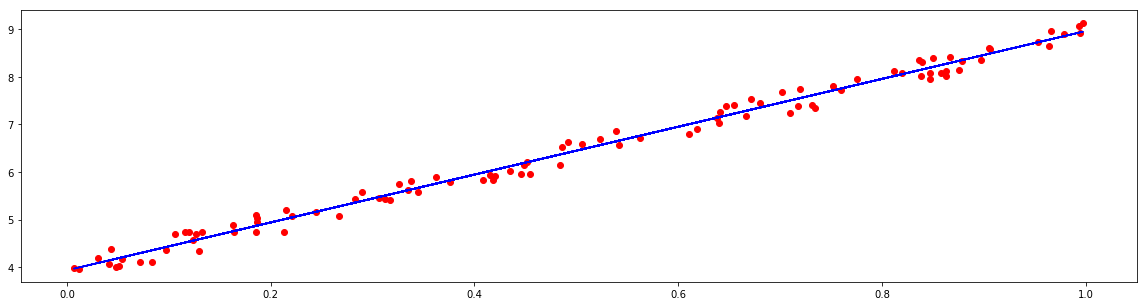

In [18]:
def gradient_descent(rate, dsigma, iterations, xs, ys):    
    sigma0 = 0
    sigma1 = 0
    history = []
    for i in range(0, iterations):
        d_sigma0 = (cost(sigma0+dsigma/2, sigma1, xs, ys) - cost(sigma0-dsigma/2, sigma1, xs, ys))/dsigma
        d_sigma1 = (cost(sigma0, sigma1+dsigma/2, xs, ys) - cost(sigma0, sigma1-dsigma/2, xs, ys))/dsigma
        
        sigma0 -= rate * (1/len(xs))*d_sigma0
        sigma1 -= rate * (1/len(xs))*d_sigma1
        
        history.append((i, sigma0, sigma1))
        
    return history

history = gradient_descent(rate=1, dsigma=0.01, iterations=10000, xs=xs, ys=ys)

(_, sigma0, sigma1) = history[-1]
print(f'{sigma0} + x*{sigma1}')

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.title('sigma0')
plt.scatter([x[0] for x in history], [x[1] for x in history], s=1)

plt.subplot(3, 1, 2)
plt.title('sigma1')
plt.scatter([x[0] for x in history], [x[2] for x in history], s=1)

plt.subplot(3, 1, 3)
plt.title('J')
plt.scatter([x[0] for x in history], [cost(x[1], x[2], xs, ys) for x in history], s=1)

plt.show()

plt.figure(figsize=(20, 5))
plt.scatter(xs, ys, color='r')
plt.plot(xs, [sigma0+sigma1*x for x in xs], color='b')
plt.show()